In [1]:
import collections
from pprint import pprint
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import datetime
from datetime import timedelta
import numpy as np
import seaborn as sns


file_path="E:/Data/Private/MIMIC_III/mimic_csv/"
outfile_path="E:/Data/Private/MIMIC_III/mimic_csv/Clean_data/"

In [2]:
diag=pd.read_csv(file_path+"DIAGNOSES_ICD.csv",index_col=0)

In [3]:
diag.head()

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
ROW_ID,,,,
1297,109,172335,1.0,40301
1298,109,172335,2.0,486
1299,109,172335,3.0,58281
1300,109,172335,4.0,5855
1301,109,172335,5.0,4254


### ICD9_CODEを頭3桁のshort_codeに変換

In [4]:
diag["ICD9_short"]=diag["ICD9_CODE"].astype(str).str[:3]
diag.head()

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ICD9_short
ROW_ID,,,,,
1297,109,172335,1.0,40301,403
1298,109,172335,2.0,486,486
1299,109,172335,3.0,58281,582
1300,109,172335,4.0,5855,585
1301,109,172335,5.0,4254,425


### SEQ_NUM==1 (主訴)のみを抽出する

In [5]:
# 主訴のみのレコードを取り出し
# SEQ_NUM==1.0のものを抽出すればよい
prim_diag=diag[diag["SEQ_NUM"]==1.0]
prim_diag.head()

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ICD9_short
ROW_ID,,,,,
1297,109,172335,1.0,40301,403
1311,109,173633,1.0,40301,403
1488,112,174105,1.0,53100,531
1493,113,109976,1.0,1915,191
1496,114,178393,1.0,41401,414


In [13]:
prim_diag["ICD9_short"].value_counts().reset_index()

,index,ICD9_short
0,V30,6339
1,414,3576
2,038,3389
3,410,3307
4,424,1721
...,...,...
646,974,1
647,269,1
648,011,1
649,542,1


In [10]:
prim_diag["ICD9_short"].value_counts().reset_index().to_csv("ICD9_record_to_rank.csv")

### 主訴のみのデータで割合を円グラフに

In [15]:
prim_diag.to_csv("prim_diag.csv")

In [7]:
# 円グラフ描画関数 (df:dataframe , col : str , top_num : int , title : str)
def plot_pie(df , col , top_num ,title=None):
    # %matplotlib inline
    counter = collections.Counter(df[col])
    # 上位n個を表示（それ以外は Others）
    top_num=top_num
    ranked_data = counter.most_common(top_num)
    print(f'ranked_data={ranked_data} \n')
    others_num=len(counter)-top_num

    # ラベル
    labels = [x[0] for x in ranked_data] + [f'Others:{others_num}']
    # 切片
    values = [x[1] for x in ranked_data]
    values = values + [len(df) - sum(values)]
    print(f"values : {values} \n")

    # 合計
    total = sum(values)

    plt.figure(figsize=(15, 15))
    explode = [0.05]*(len(values) - 1) + [0] 

    # 円グラフ
    plt.pie(values, labels=labels, explode=tuple(explode),
       autopct='%.1f', shadow=True, startangle=90)
    # タイトル
    if title is not None:
        plt.title(f'{title}: Top{top_num} : N={total}', size=18)
        plt.savefig(f"{title}.png")
    else:
        plt.title(f'Top{top_num} Pie Chart: N={total}', size=18)

In [160]:
# 棒グラフ描画関数 (df:dataframe , col : str , top_num : int , title : str)
def plot_bar(df , col , top_num ,title=None):
    # %matplotlib inline
    counter = collections.Counter(df[col])
    # 上位n個を表示（それ以外は Others）
    top_num=top_num
    ranked_data = counter.most_common(top_num)
    print(f'ranked_data={ranked_data} \n')
    others_num=len(counter)-top_num

    # ラベル
    labels = [x[0] for x in ranked_data] + [f'Others:{others_num}']
    # 切片
    values = [x[1] for x in ranked_data]
    values = values + [len(df) - sum(values)]
    print(f"values : {values} \n")

    # 合計
    total = sum(values)

    plt.figure(figsize=(8, 8))
#     explode = [0.05]*(len(values) - 1) + [0] 

    # 棒グラフ
    plt.bar(labels,values)
    # タイトル
    if title is not None:
        plt.title(f'{title}: Top{top_num} : N={total}', size=18)
        plt.savefig(f"{title}.png")
    else:
        plt.title(f'Top{top_num} Pie Chart: N={total}', size=18)

In [ ]:
plot_pie(prim_diag,"ICD9_short",30,title="PrimDiag")

ranked_data=[('V30', 6339), ('414', 3576), ('038', 3389), ('410', 3307), ('424', 1721), ('518', 1563), ('428', 1488), ('996', 1429), ('V31', 1171), ('431', 1030), ('852', 1020), ('427', 1001), ('250', 925), ('441', 802), ('998', 775)] 

values : [6339, 3576, 3389, 3307, 1721, 1563, 1488, 1429, 1171, 1030, 1020, 1001, 925, 802, 775, 29393] 



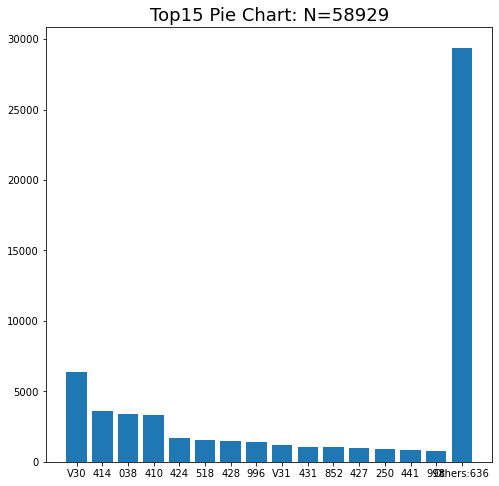

In [161]:
plot_bar(prim_diag,"ICD9_short",15)

### 主訴以外も合わせた割合を円グラフで表示

In [ ]:
plot_pie(diag,"ICD9_short",30,title="AllDiag")

ranked_data=[('401', 21329), ('427', 20998), ('428', 20676), ('276', 20440), ('250', 16454), ('414', 15759), ('272', 14768), ('518', 14608), ('285', 12910), ('584', 11467), ('V45', 10924), ('530', 7965), ('V58', 7961), ('599', 7572), ('E87', 7313)] 

values : [21329, 20998, 20676, 20440, 16454, 15759, 14768, 14608, 12910, 11467, 10924, 7965, 7961, 7572, 7313, 439903] 



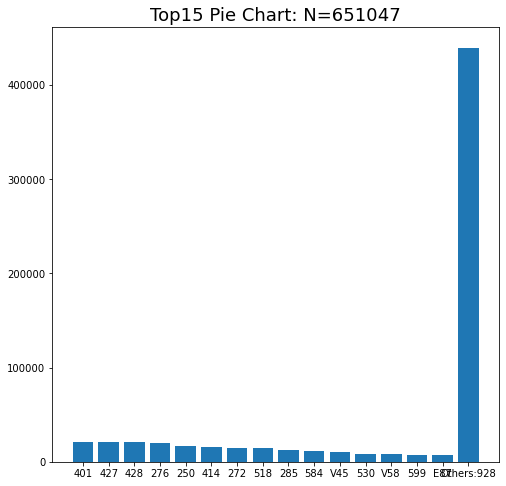

In [162]:
plot_bar(diag,"ICD9_short",15)

### 入室回数による分析

In [21]:
counter = collections.Counter(prim_diag["SUBJECT_ID"])
counter=counter.most_common()
c_np=np.array(counter)

In [25]:
print(f"Mean of Admission times : {c_np[: ,1].mean():.2f}")
print(f"Std of Admission times : {c_np[: ,1].std():.2f}")

Mean of Admission times : 1.27
Std of Admission times : 0.89


(0.0, 100.0)

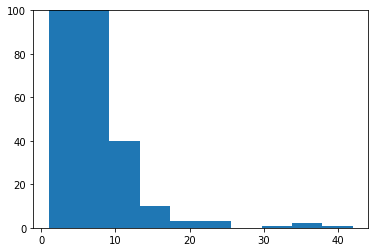

In [29]:
plt.hist(np.array(counter)[: ,1])
plt.ylim(0,100)

In [ ]:
list(prim_diag["SUBJECT_ID"].value_counts().where(lambda d:d<3).dropna().index)

In [76]:
# 平均1.27 ,標準偏差が0.89なので、2回以下くらいが大半
# 入室3回で分離する
# ここでは3回以上、2回以下それぞれのSUBJECTの人数を調べた
upper_patients_num=prim_diag["SUBJECT_ID"].value_counts().where(lambda d:d>=3).dropna()
lower_patients_num=prim_diag["SUBJECT_ID"].value_counts().where(lambda d:d<3).dropna()
print(f"Over 2 times subject num: {len(upper_patients_num)}")
print(f"1 or 2 times subject num: {len(lower_patients_num)}")

Over 2 times subject num: 2374
1 or 2 times subject num: 44143


In [86]:
# 3回以上,2回以下のそれぞれをSUBJECT_IDからdfで取り出し
# ここでは3回以上,2回以下それぞれでの入院回数を表示
upper_df=prim_diag[prim_diag["SUBJECT_ID"].isin(list(prim_diag["SUBJECT_ID"].value_counts().where(lambda d:d>=3).dropna().index))]
lower_df=prim_diag[prim_diag["SUBJECT_ID"].isin(list(prim_diag["SUBJECT_ID"].value_counts().where(lambda d:d<3).dropna().index))]
print(f"Over 2 times subject admission num: {len(upper_df)}")
print(f"1 or 2 times subject admission num: {len(lower_df)}")

Over 2 times subject admission num: 9661
1 or 2 times subject admission num: 49268


5万弱の患者数の中で2000人程度(約4%)の患者で , ６万入室のうちの1万入室(約16%)を占めている

### 2回以下の患者についてグラフ化

In [ ]:
plot_pie(lower_df,"ICD9_short",30,title="1or2 times ADM PrimDiag")
# V30は出産関連、帝王切開での出生

ranked_data=[('V30', 6335), ('414', 3382), ('410', 3007), ('038', 2477), ('424', 1615), ('V31', 1169), ('518', 1044), ('431', 984), ('852', 964), ('428', 954), ('996', 833), ('427', 816), ('441', 705), ('434', 660), ('998', 602), ('198', 501), ('250', 500), ('430', 498), ('486', 480), ('578', 477)] 

values : [6335, 3382, 3007, 2477, 1615, 1169, 1044, 984, 964, 954, 833, 816, 705, 660, 602, 501, 500, 498, 480, 477, 21265] 



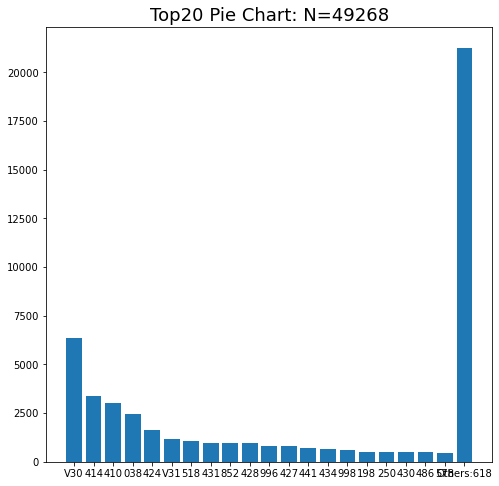

In [163]:
plot_bar(lower_df,"ICD9_short",20)

### 3回以上の患者についてグラフ化


In [ ]:
plot_pie(upper_df,"ICD9_short",30,title="Over 2 times ADM PrimDiag")

ranked_data=[('038', 912), ('996', 596), ('428', 534), ('518', 519), ('250', 425), ('410', 300), ('486', 245), ('507', 216), ('578', 201), ('414', 194), ('584', 188), ('427', 185), ('998', 173), ('491', 144), ('291', 129), ('571', 124), ('519', 122), ('403', 121), ('482', 117), ('440', 112)] 

values : [912, 596, 534, 519, 425, 300, 245, 216, 201, 194, 188, 185, 173, 144, 129, 124, 122, 121, 117, 112, 4104] 



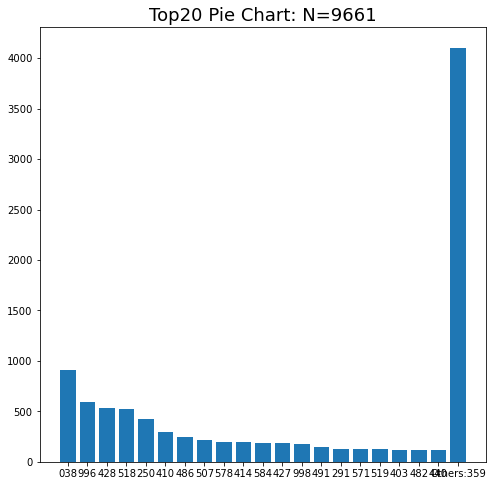

In [164]:
plot_bar(upper_df,"ICD9_short",20)

## ICD9から頭文字Vのものを除く

In [17]:
diag["ICD9_head"]=diag["ICD9_CODE"].astype(str).str[:1]
diag.head()

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ICD9_short,ICD9_head
ROW_ID,,,,,,
1297,109,172335,1.0,40301,403,4
1298,109,172335,2.0,486,486,4
1299,109,172335,3.0,58281,582,5
1300,109,172335,4.0,5855,585,5
1301,109,172335,5.0,4254,425,4


In [18]:
len(diag[diag["ICD9_head"]=="V"])

74705

In [19]:
len(diag[diag["ICD9_head"]!="V"])

576342

In [20]:
diag_nonv=diag[diag["ICD9_head"]!="V"].drop(columns="ICD9_head")
diag_nonv.head()

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ICD9_short
ROW_ID,,,,,
1297,109,172335,1.0,40301,403
1298,109,172335,2.0,486,486
1299,109,172335,3.0,58281,582
1300,109,172335,4.0,5855,585
1301,109,172335,5.0,4254,425


## 主訴取り出し(nonv)

In [21]:
# 主訴のみのレコードを取り出し
# SEQ_NUM==1.0のものを抽出すればよい
prim_nonv=diag_nonv[diag_nonv["SEQ_NUM"]==1.0]
prim_nonv

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ICD9_short
ROW_ID,,,,,
1297,109,172335,1.0,40301,403
1311,109,173633,1.0,40301,403
1488,112,174105,1.0,53100,531
1493,113,109976,1.0,1915,191
1496,114,178393,1.0,41401,414
...,...,...,...,...,...
639745,97488,152542,1.0,566,566
639756,97488,161999,1.0,43411,434
639780,97492,189314,1.0,34680,346


In [22]:
plot_pie(prim_nonv,"ICD9_short",30,title="ICD9_nonVCode PrimDiag")

NameError: name 'plot_pie' is not defined

ranked_data=[('414', 3576), ('038', 3389), ('410', 3307), ('424', 1721), ('518', 1563), ('428', 1488), ('996', 1429), ('431', 1030), ('852', 1020), ('427', 1001), ('250', 925), ('441', 802), ('998', 775), ('486', 725), ('434', 716), ('578', 678), ('507', 661), ('584', 645), ('198', 571), ('430', 529)] 

values : [3576, 3389, 3307, 1721, 1563, 1488, 1429, 1030, 1020, 1001, 925, 802, 775, 725, 716, 678, 661, 645, 571, 529, 24408] 



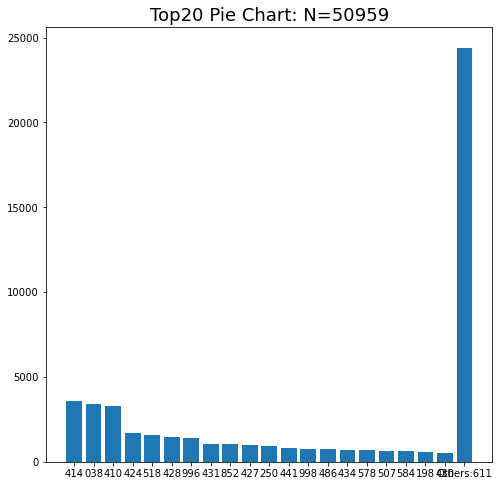

In [165]:
plot_bar(prim_nonv,"ICD9_short",20)

In [14]:
# ICD9をshortcodeからさらに大分類に分ける a-rまで
def classifyICD(code):
    if code <=139:
        return "a" #infectious and parasitic diseases
    elif code<=239:
        return "b" #neoplasms
    elif code<=279:
        return "c" #endocrine, nutritional and metabolic diseases, and immunity disorders
    elif code<=289:
        return "d" #Diseases of the Blood and Blood-forming Organs
    elif code<=319:
        return  "e"#Mental Disorders
    elif code<= 359:
        return "f"# diseases of the nervous system
    elif code<= 389:
        return  "g"#sense organs
    elif code<= 459:
        return "h"# Diseases of the Circulatory System
    elif code<= 519 :
        return  "i"# Diseases of the Respiratory System
    elif code<= 579:
        return "j"# Diseases of the Digestive System
    elif code<= 629:
        return "k"# Diseases of the Genitourinary System
    elif code<= 679:
        return  "l"# Complications of Pregnancy, Childbirth, and the Puerperium
    elif code<= 709:
        return "m"#Diseases of the Skin and Subcutaneous Tissue
    elif code<= 739:
        return  "n"# Diseases of the Musculoskeletal System and Connective Tissue
    elif code<= 759:
        return  "o"# Congenital Anomalies
    elif code<= 779:
        return  "p"#Certain Conditions originating in the Perinatal Period
    elif code<= 799:
        return  "q"#Symptoms, Signs and Ill-defined Conditions
    elif code<= 999:
        return  "r"#Injury and Poisoning
    else :
        return "other"
        
    

In [15]:
class_diag_dict={
 "a": "infectious and parasitic diseases",
 "b": "neoplasms",
"c": "endocrine, nutritional and metabolic diseases, and immunity disorders",
 "d": "Diseases of the Blood and Blood-forming Organs",
 "e":"Mental Disorders",
"f":"diseases of the nervous system",
"g":"sense organs",
"h":"Diseases of the Circulatory System",
 "i":"Diseases of the Respiratory System",
"j": "Diseases of the Digestive System",
"k": "Diseases of the Genitourinary System",
"l": "Complications of Pregnancy, Childbirth, and the Puerperium",
"m":"Diseases of the Skin and Subcutaneous Tissue",
"n": "Diseases of the Musculoskeletal System and Connective Tissue",
"o": "Congenital Anomalies",
"p":"Certain Conditions originating in the Perinatal Period",
"q":"Symptoms, Signs and Ill-defined Conditions",
"r":"Injury and Poisoning"
}

In [23]:
prim_nonv["ICD_classfy"]=prim_nonv["ICD9_short"].astype(int).map(classifyICD)
prim_nonv.head()

C:\Users\182214\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ICD9_short,ICD_classfy
ROW_ID,,,,,,
1297,109,172335,1.0,40301,403,h
1311,109,173633,1.0,40301,403,h
1488,112,174105,1.0,53100,531,j
1493,113,109976,1.0,1915,191,b
1496,114,178393,1.0,41401,414,h


In [24]:
def get_swap_dict(d):
    return {v: k for k, v in d.items()}

In [25]:
counts=dict(prim_nonv["ICD_classfy"].value_counts())
d_inv=get_swap_dict(class_diag_dict) # diag->classのdict
for k in d_inv.keys():
    counts[k]=counts[d_inv[k]]
    del counts[d_inv[k]]
pprint(counts)

{'Certain Conditions originating in the Perinatal Period': 301,
 'Complications of Pregnancy, Childbirth, and the Puerperium': 152,
 'Congenital Anomalies': 296,
 'Diseases of the Blood and Blood-forming Organs': 226,
 'Diseases of the Circulatory System': 18312,
 'Diseases of the Digestive System': 5222,
 'Diseases of the Genitourinary System': 1062,
 'Diseases of the Musculoskeletal System and Connective Tissue': 694,
 'Diseases of the Respiratory System': 4724,
 'Diseases of the Skin and Subcutaneous Tissue': 178,
 'Injury and Poisoning': 8399,
 'Mental Disorders': 502,
 'Symptoms, Signs and Ill-defined Conditions': 598,
 'diseases of the nervous system': 812,
 'endocrine, nutritional and metabolic diseases, and immunity disorders': 1457,
 'infectious and parasitic diseases': 4210,
 'neoplasms': 3797,
 'sense organs': 17}


In [36]:
prim_nonv["ICD_classfy"].value_counts().reset_index().to_csv("Diag_to_rank.csv")

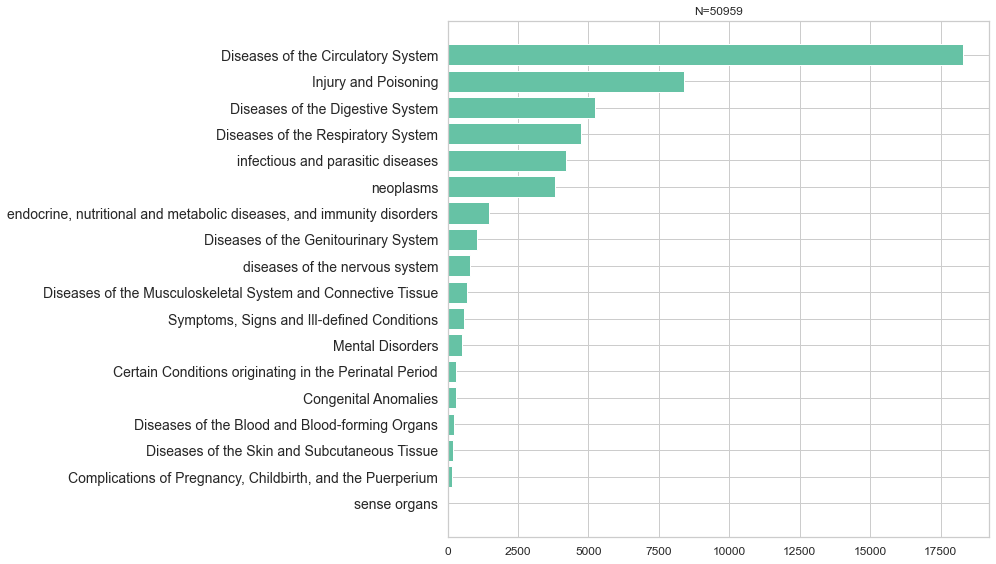

In [218]:
sorted_counts=dict(sorted(counts.items() , key=lambda x:x[1]))
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set2')
x=np.array(list(sorted_counts.keys()))
y=np.array(list(sorted_counts.values()))
x_position = np.arange(len(counts))
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1, 1, 1)
ax.barh(x_position, y, tick_label=x)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=14)
# plt.show()
plt.title("N=50959")
plt.tight_layout()

plt.savefig("./materials/number_of_patients_by_diagnoses.jpg")



In [216]:
prim_nonv["ICD_classfy"].value_counts().sum()

50959

In [172]:
y

array(dict_values([4210, 3797, 1457, 226, 502, 812, 17, 18312, 4724, 5222, 1062, 152, 178, 694, 296, 301, 598, 8399]),
      dtype=object)